In [3]:
import catboost as cb

In [4]:
print('starting')
import sys
import pandas as pd
import numpy as np
import itertools
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

from tensorflow import keras
from keras import backend as K, optimizers, Model
from keras.layers import Concatenate, Activation, Dense, Flatten, LSTM, RepeatVector, Dropout, TimeDistributed, GRU, Input
from keras.layers.embeddings import Embedding
from keras.models import model_from_json, Sequential
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,CSVLogger
from keras.regularizers import l2



from dask import dataframe as dd
from dask.multiprocessing import get
from multiprocessing import cpu_count
nCores=cpu_count()



starting


Using TensorFlow backend.


In [5]:
print('starting')
import pandas as pd
import numpy as np
import itertools
from IPython.display import SVG

import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight


from keras import backend as K, optimizers, Model
from keras.layers import Concatenate, Activation, Dense, Flatten, LSTM, RepeatVector, Dropout, TimeDistributed, GRU, Input
from keras.layers.embeddings import Embedding
from keras.models import model_from_json, Sequential
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import EarlyStopping, ReduceLROnPlateau,CSVLogger
from keras.regularizers import l2

starting


In [6]:
pd.set_option('display.max_columns', 2200)
pd.set_option('display.max_rows', 2200)
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [7]:
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb
from time import time
import datetime
from copy import deepcopy
from sklearn.metrics import roc_auc_score

In [8]:
#  Libraries
import numpy as np 
import pandas as pd 
# Data processing, metrics and modeling
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold,KFold
#from bayes_opt import BayesianOptimization
from datetime import datetime
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score, roc_auc_score, f1_score, roc_curve, auc,precision_recall_curve
from sklearn import metrics
from sklearn import preprocessing
# Lgbm
import lightgbm as lgb
# Suppr warning
import warnings
warnings.filterwarnings("ignore")

import itertools
from scipy import interp

# Plots
#import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

# Data

In [9]:
train_df = pd.read_pickle('train_df_388features')
test_df = pd.read_pickle('test_df_388features')

In [10]:
train_df = train_df.iloc[:,1:]
test_df = test_df.iloc[:,1:]

In [11]:
train_df.head()
train_df.shape
test_df.shape

,V96,V47,V36,V169,id_01_fq_encnew,id_14,V12,id_17,V135new,V72,V267,V291,id_33_0new,V208,V24,C4,id_03_fq_encnew,V124new,V279,V332,DeviceType,V62,V69,V90,V225,card6_count_full,V316new,V10,V140,D11__DeviceInfo,V189,V37,id_11_fq_encnew,V233,id_31_e_firefoxnew,C6_fq_encnew,V207,V25,V285,C2_fq_encnew,id_07,V8,V313,P_emaildomain_bin,V61,V317,V29new,DeviceInfo_c_fq_encnew,V66,id_30_c_fq_encnew,V293new,V6,DeviceInfo,id_05,V271,card4,card4_count_full,V67,id_02_to_std_card1,card5,V77,nulls1,dist2_fq_encnew,D6,id_30_v_fq_encnew,V221,id_06,C9_fq_encnew,id_33_fq_encnew,id_02_fq_encnew,D13,id_18_fq_encnew,V75,id_33_0_fq_encnew,V56,id_02,V35,V99,M7,V283,card2__id_20,V70,V130,DeviceInfo_fq_encnew,email_checknew,C14_fq_encnew,V311new,V87,card5_count_full,V218,V20,id_05_fq_encnew,id_14_fq_encnew,D15_to_mean_card4,id_30,card3_TransactionAmt_meannew,V282,id_19,V78,C3new,V315new,card5_fq_encnew,id_01,id_18,D14,C5_fq_encnew,V55,V86,id_30_vnew,V82,id_02__id_20,id_33_1new,D15_to_mean_card1,DeviceInfo__P_emaildomain,card2_fq_encnew,id_17_fq_encnew,id_06_fq_encnew,V307,D5,card2__dist1,C2,V65,card3_count_full,V54,C11_fq_encnew,id_19_fq_encnew,id_31,V48,M3,D15,id_31_count_dist,address_matchnew,C5,dist1,V310,P_emaildomain_fq_encnew,TransactionAmt_to_std_card4,dist1_fq_encnew,D8,V165,card2,D2_fq_encnew,card5_TransactionAmt_stdnew,P_emaildomain,addr1_fq_encnew,card5_TransactionAmt_meannew,V53,Transaction_day_of_week,C_sumnew,D11,C1_fq_encnew,P_emaildomain__C2,card2_count_full,addr1,D15_to_std_addr1,Transaction_hour_of_day,card1_TransactionAmt_stdnew,C9,card2_TransactionAmt_stdnew,uid_TransactionAmt_meannew,D1_fq_encnew,M4_target_meannew,id_20,D15_to_mean_addr1,TransactionAmt_to_std_card1,V258,TransactionAmt_to_mean_card1,D10,uid_TransactionAmt_stdnew,TransactionAmt_decimal,ProductCD,C13_fq_encnew,D2,addr1_count_full,TransactionAmt_to_mean_card4,C6,M5,D1,M4,C11,D4,M6,card1_TransactionAmt_meannew,card1,card1__card5,C1,TransactionAmt,addr1__card1,uid2_TransactionAmt_stdnew,card2_TransactionAmt_meannew,card6,uid2_TransactionAmt_meannew,card1_count_full,C14,C13,V177,V5,V265,V322,D15_to_std_card4,V180,V40,V46,V7,V94,C1_validnew,V143,D8_fq_encnew,V150,V239,V170,id_33_count_dist,V126,P_emaildomain_suffix,V200,V259,C12,V261,V309new,V102new,D7,V182,V220,V278,V277,V44,M9,V125new,V139,V19,R_emaildomain,V108new,V127,V2,V13,V272,V264,V262,id_31_e_mobilenew,V306,V289new,V133new,V38,V49,V245,id_33,V222,V129,R_emaildomain_bin,V81,local_hournew,V131,V274,id_31_e_samsungnew,C7,V215,V190,V76,card3_TransactionAmt_stdnew,D3,V209,V187,ProductCD_target_meannew,V45,V257,id_01_count_dist,V312,V205,D15_to_std_card1,V91,V281,ae_reconstruction_error,V266,V4,V292,V319new,V203,C10_fq_encnew,V321new,V132,V300new,V137new,V134new,C8_fq_encnew,M8,V296,V23,M2,V318new,V294,id_02__D8,V128,id_33_1_fq_encnew,V136new,C10,C8,id_30_fq_encnew,D12,D9,V320new,V83,DeviceInfo_cnew,R_emaildomain_fq_encnew,V308,id_02_to_std_card4,R_email_prefixnew,local_hour_distnew,V314,id_13,dist2,id_02_to_mean_card4,D9_fq_encnew,id_02_to_mean_card1,P_email_prefixnew,card5__P_emaildomain,id_15,V156,V263,V85,V30,V243,V276,V280,V301new,id_09,V11,id_09_fq_encnew,V52,V160,card3,V268,V234,V3,V270,id_31_e_chromenew,DateC9minus_mean_all,Date+HourD10minus_mean_all,hourae_reconstruction_errorminus_mean_all,uid2ae_reconstruction_errorstd,dayofwweekae_reconstruction_errorminus_mean_all,V13TransactionAmtminus_mean_all,D1_minus_D15,P_emaildomain_fq_encnew_plus_card1_count_full,addr1_fq_encnew_target_mean,card5__P_emaildomain_target_mean,P_emaildomain__C2_target_mean,card2_TransactionAmt_stdnew_target_mean,card2__id_20_target_mean,id_20_target_mean,card2_count_full_target_mean,DeviceInfo__P_emaildomain_target_mean,uid_TransactionAmt_stdnew_target_mean,dist1_target_mean,card2_TransactionAmt_meannew_target_mean,uid_TransactionAmt_meannew_target_mean,uid2_TransactionAmt_stdnew_target_mean,uid2_TransactionAmt_meannew_target_mean,card1_TransactionAmt_meannew_target_mean,P_emaildomain_target_mean,dist1_fq_encnew_target_mean,id_06_target_mean

(590540, 389)

(506691, 388)

In [12]:
train_df_added = pd.read_pickle('uid4_train_df_added')
test_df_added = pd.read_pickle('uid4_test_df_added')

features_added = [fea for fea in train_df_added if fea not in train_df]

train_df_added = train_df_added[features_added]
test_df_added = test_df_added[features_added]

train_df_added.index = train_df.index
test_df_added.index = test_df.index

train_df = pd.concat([train_df, train_df_added], axis = 1)
test_df = pd.concat([test_df, test_df_added], axis = 1)

In [13]:
features = list(train_df)
features.remove('isFraud')

In [14]:
len(features)

394

In [15]:
train_df_added = pd.read_pickle('daypassed_features_train_df_added')
test_df_added = pd.read_pickle('daypassed_features_test_df_added')

# train_df_added.columns = ['new_uid4_' + str(fea) for fea in train_df_added.columns]
# test_df_added.columns = train_df_added.columns

features_added = [fea for fea in train_df_added if fea not in train_df]

train_df_added = train_df_added[features_added]
test_df_added = test_df_added[features_added]

train_df_added.index = train_df.index
test_df_added.index = test_df.index

train_df = pd.concat([train_df, train_df_added], axis = 1)
test_df = pd.concat([test_df, test_df_added], axis = 1)

In [16]:
# train_df_added = pd.read_pickle('uid4_train_df_added')
# test_df_added = pd.read_pickle('uid4_test_df_added')

# features_added = [fea for fea in train_df_added if fea not in train_df]

# train_df_added = train_df_added[features_added]
# test_df_added = test_df_added[features_added]

# train_df_added.index = train_df.index
# test_df_added.index = test_df.index

# train_df = pd.concat([train_df, train_df_added], axis = 1)
# test_df = pd.concat([test_df, test_df_added], axis = 1)

In [17]:
len(features_added)

30

In [18]:
train_df.shape
test_df.shape

(590540, 425)

(506691, 424)

In [19]:
features = features[:394]

In [20]:
len(features)
features += ['daypassed_minus_D15','daypassed_plus_D15','daypassed_minus_D2' ]
len(features)

394

397

In [21]:
data_added = pd.read_pickle('all_uid4')

In [22]:
data_added.shape

(1097231, 295)

In [23]:
data_added.columns = ['new' + str(fea) for fea in data_added.columns]

In [24]:
train_df_added = data_added[:590540]
test_df_added = data_added[590540:]

# train_df_added.columns = ['new_uid4_' + str(fea) for fea in train_df_added.columns]
# test_df_added.columns = train_df_added.columns

features_added = [fea for fea in train_df_added if fea not in train_df]

train_df_added = train_df_added[features_added]
test_df_added = test_df_added[features_added]

train_df_added.index = train_df.index
test_df_added.index = test_df.index

train_df = pd.concat([train_df, train_df_added], axis = 1)
test_df = pd.concat([test_df, test_df_added], axis = 1)

In [25]:
len(list(train_df_added))

295

In [31]:
len(features)
features += list(train_df_added)
len(features)

397

692

In [32]:
train_df.shape
test_df.shape

(590540, 720)

(506691, 719)

In [33]:
features

['V96',
 'V47',
 'V36',
 'V169',
 'id_01_fq_encnew',
 'id_14',
 'V12',
 'id_17',
 'V135new',
 'V72',
 'V267',
 'V291',
 'id_33_0new',
 'V208',
 'V24',
 'C4',
 'id_03_fq_encnew',
 'V124new',
 'V279',
 'V332',
 'DeviceType',
 'V62',
 'V69',
 'V90',
 'V225',
 'card6_count_full',
 'V316new',
 'V10',
 'V140',
 'D11__DeviceInfo',
 'V189',
 'V37',
 'id_11_fq_encnew',
 'V233',
 'id_31_e_firefoxnew',
 'C6_fq_encnew',
 'V207',
 'V25',
 'V285',
 'C2_fq_encnew',
 'id_07',
 'V8',
 'V313',
 'P_emaildomain_bin',
 'V61',
 'V317',
 'V29new',
 'DeviceInfo_c_fq_encnew',
 'V66',
 'id_30_c_fq_encnew',
 'V293new',
 'V6',
 'DeviceInfo',
 'id_05',
 'V271',
 'card4',
 'card4_count_full',
 'V67',
 'id_02_to_std_card1',
 'card5',
 'V77',
 'nulls1',
 'dist2_fq_encnew',
 'D6',
 'id_30_v_fq_encnew',
 'V221',
 'id_06',
 'C9_fq_encnew',
 'id_33_fq_encnew',
 'id_02_fq_encnew',
 'D13',
 'id_18_fq_encnew',
 'V75',
 'id_33_0_fq_encnew',
 'V56',
 'id_02',
 'V35',
 'V99',
 'M7',
 'V283',
 'card2__id_20',
 'V70',
 'V130',
 

In [34]:
list(features[388:])

['days_created',
 'uid4',
 'uid4_count',
 'uid4_card_duration',
 'uid4_C13_diff_pre',
 'uid4_C13_diff_next',
 'daypassed_minus_D15',
 'daypassed_plus_D15',
 'daypassed_minus_D2',
 'newuid4_ae_reconstruction_error_mean',
 'newuid4_ae_reconstruction_error_std',
 'newuid4_ae_reconstruction_error__minus_mean',
 'newuid4_ae_reconstruction_error__divide_mean',
 'newuid4_ae_reconstruction_error__divide_std',
 'newuid4_TransactionAmt_mean',
 'newuid4_TransactionAmt_std',
 'newuid4_dist1_mean',
 'newuid4_dist1_std',
 'newuid4_dist2_mean',
 'newuid4_dist2_std',
 'newuid4_C1_mean',
 'newuid4_C1_std',
 'newuid4_C2_mean',
 'newuid4_C2_std',
 'newuid4_C3_mean',
 'newuid4_C3_std',
 'newuid4_C4_mean',
 'newuid4_C4_std',
 'newuid4_C5_mean',
 'newuid4_C5_std',
 'newuid4_C6_mean',
 'newuid4_C6_std',
 'newuid4_C7_mean',
 'newuid4_C7_std',
 'newuid4_C8_mean',
 'newuid4_C8_std',
 'newuid4_C9_mean',
 'newuid4_C9_std',
 'newuid4_C10_mean',
 'newuid4_C10_std',
 'newuid4_C11_mean',
 'newuid4_C11_std',
 'newuid4

In [35]:
len(features)

692

# base score

In [36]:
categorical_features = ['ProductCD','M4',
                        'card1','card2','card3','card4','card5','card6',
                        'addr1','addr2','dist1','dist2',
                        'P_emaildomain','R_emaildomain',
                       ]

In [37]:
cat_features = [
'ProductCD', #5 5
'card1' #13553 17091
'card2', #501 502
'card3', #115 134
'card4', #5 5
'card5', #120 139
'card6', #5 5
'addr1',
'addr2',
'dist1',
'dist2',
'P_emaildomain', #60 61
'R_emaildomain', #61 61
'M2', #3 3
'M3', #3 3
'M4', #4 4
'M5', #3 3
'M6', #3 3
'M7', #3 3
'M8', #3 3
'M9', #3 3
'id_13', #55 56
'id_14', #26 29
'id_15', #4 4
'id_17', #105 128
'id_18', #19 20
'id_19', #523 569
'id_20', #395 548
'id_30', #76 88
'id_31', #131 173
'id_33', #261 462
'DeviceType',
'uid4'] #3 3]
#DeviceInfo #1780 2788]

In [38]:
cat_features += [
 'R_email_prefixnew',
 'R_emaildomain_bin',
 'P_emaildomain_suffix',
 'DeviceInfo_cnew',
 'Transaction_hour_of_day']

In [39]:
import gc
gc.collect()

347

In [40]:
len(cat_features)
cat_features = [fea for fea in cat_features if fea in features]

37

In [41]:
len(cat_features)
cat_features

35

In [ ]:
# final cat_features used

In [42]:
cat_features_index = [features.index(fea) for fea in cat_features]

In [43]:
param_cat = {'depth': 13,
 'l2_leaf_reg': 1.012306792416892,
 'one_hot_max_size': int(15),
 #'rsm': 0.6,
 'subsample': 0.8598290446356001,
 'task_type':"GPU"}

In [44]:
len(features)

692

In [45]:
train_df[features].shape

(590540, 692)

In [46]:
#session1.add_object_as_file('24','features',features)

In [47]:
import gc
gc.collect()

160

In [48]:
import multiprocessing

multiprocessing.cpu_count()

4

In [49]:
target = 'isFraud'

In [50]:
from time import time

In [51]:
gc.collect()

80

In [52]:
import catboost as cb


fold 1


0:	learn: 0.9471740	test: 0.8352905	best: 0.8352905 (0)	total: 1.16s	remaining: 48m 25s
100:	learn: 0.9756181	test: 0.9237695	best: 0.9237695 (100)	total: 1m 48s	remaining: 43m 4s
200:	learn: 0.9837195	test: 0.9333488	best: 0.9333488 (200)	total: 3m 40s	remaining: 41m 58s
300:	learn: 0.9874518	test: 0.9376224	best: 0.9376224 (300)	total: 5m 27s	remaining: 39m 50s
400:	learn: 0.9897688	test: 0.9401022	best: 0.9401262 (399)	total: 7m 13s	remaining: 37m 48s
500:	learn: 0.9915454	test: 0.9420363	best: 0.9420363 (500)	total: 8m 58s	remaining: 35m 49s
600:	learn: 0.9930726	test: 0.9439037	best: 0.9439037 (600)	total: 10m 45s	remaining: 34m
700:	learn: 0.9942279	test: 0.9446738	best: 0.9446738 (700)	total: 12m 31s	remaining: 32m 7s
800:	learn: 0.9950716	test: 0.9456370	best: 0.9456665 (787)	total: 14m 16s	remaining: 30m 16s
900:	learn: 0.9957517	test: 0.9458895	best: 0.9459285 (896)	total: 16m 1s	remaining: 28m 26s
1000:	learn: 0.9965928	test: 0.9462219	best: 0.9464192 (949)	total: 17m 47s	re


fold 2


0:	learn: 0.9498613	test: 0.9253858	best: 0.9253858 (0)	total: 1.19s	remaining: 49m 27s
100:	learn: 0.9725536	test: 0.9517816	best: 0.9517816 (100)	total: 1m 50s	remaining: 43m 41s
200:	learn: 0.9807351	test: 0.9567819	best: 0.9567819 (200)	total: 3m 39s	remaining: 41m 45s
300:	learn: 0.9849982	test: 0.9591183	best: 0.9591183 (300)	total: 5m 26s	remaining: 39m 47s
400:	learn: 0.9874023	test: 0.9603361	best: 0.9603361 (400)	total: 7m 10s	remaining: 37m 33s
500:	learn: 0.9896377	test: 0.9611493	best: 0.9611621 (498)	total: 8m 54s	remaining: 35m 31s
600:	learn: 0.9911333	test: 0.9616029	best: 0.9616350 (591)	total: 10m 37s	remaining: 33m 33s
700:	learn: 0.9923597	test: 0.9621673	best: 0.9621782 (683)	total: 12m 19s	remaining: 31m 38s
800:	learn: 0.9937179	test: 0.9626574	best: 0.9626707 (799)	total: 14m 3s	remaining: 29m 49s
900:	learn: 0.9945259	test: 0.9627851	best: 0.9628049 (874)	total: 15m 46s	remaining: 27m 59s
1000:	learn: 0.9952127	test: 0.9628500	best: 0.9628750 (960)	total: 17m 


fold 3


0:	learn: 0.9463218	test: 0.9198305	best: 0.9198305 (0)	total: 1.15s	remaining: 47m 53s
100:	learn: 0.9736461	test: 0.9517742	best: 0.9517742 (100)	total: 1m 49s	remaining: 43m 15s
200:	learn: 0.9823449	test: 0.9563910	best: 0.9563910 (200)	total: 3m 37s	remaining: 41m 28s
300:	learn: 0.9861027	test: 0.9585333	best: 0.9585333 (300)	total: 5m 22s	remaining: 39m 16s
400:	learn: 0.9886802	test: 0.9593943	best: 0.9593943 (400)	total: 7m 7s	remaining: 37m 16s
500:	learn: 0.9904344	test: 0.9599860	best: 0.9599935 (499)	total: 8m 50s	remaining: 35m 17s
600:	learn: 0.9918064	test: 0.9602139	best: 0.9602160 (578)	total: 10m 33s	remaining: 33m 23s
700:	learn: 0.9930227	test: 0.9605531	best: 0.9605545 (699)	total: 12m 16s	remaining: 31m 31s
800:	learn: 0.9941331	test: 0.9607086	best: 0.9607735 (759)	total: 14m	remaining: 29m 42s
bestTest = 0.9607735276
bestIteration = 759
Shrink model to first 760 iterations.



fold 4


0:	learn: 0.9461485	test: 0.9297199	best: 0.9297199 (0)	total: 1.15s	remaining: 47m 50s
100:	learn: 0.9726894	test: 0.9606857	best: 0.9606857 (100)	total: 1m 48s	remaining: 43m 2s
200:	learn: 0.9821866	test: 0.9657556	best: 0.9657556 (200)	total: 3m 37s	remaining: 41m 31s
300:	learn: 0.9865114	test: 0.9674259	best: 0.9674259 (300)	total: 5m 24s	remaining: 39m 33s
400:	learn: 0.9893774	test: 0.9682148	best: 0.9682327 (399)	total: 7m 9s	remaining: 37m 28s
500:	learn: 0.9915564	test: 0.9688238	best: 0.9688317 (499)	total: 8m 54s	remaining: 35m 31s
600:	learn: 0.9928491	test: 0.9691921	best: 0.9692046 (598)	total: 10m 37s	remaining: 33m 35s
700:	learn: 0.9939088	test: 0.9694861	best: 0.9695017 (693)	total: 12m 21s	remaining: 31m 41s
800:	learn: 0.9948308	test: 0.9696312	best: 0.9696442 (781)	total: 14m 4s	remaining: 29m 51s
900:	learn: 0.9955067	test: 0.9696238	best: 0.9696765 (864)	total: 15m 47s	remaining: 28m 2s
bestTest = 0.9696764946
bestIteration = 864
Shrink model to first 865 itera


fold 5


0:	learn: 0.9506430	test: 0.9086966	best: 0.9086966 (0)	total: 1.17s	remaining: 48m 35s
100:	learn: 0.9735748	test: 0.9428452	best: 0.9428452 (100)	total: 1m 48s	remaining: 43m 4s
200:	learn: 0.9825909	test: 0.9470535	best: 0.9470535 (200)	total: 3m 38s	remaining: 41m 36s
300:	learn: 0.9865234	test: 0.9485670	best: 0.9485670 (300)	total: 5m 23s	remaining: 39m 25s
400:	learn: 0.9892093	test: 0.9493825	best: 0.9493825 (400)	total: 7m 8s	remaining: 37m 24s
500:	learn: 0.9909770	test: 0.9498021	best: 0.9498152 (497)	total: 8m 52s	remaining: 35m 26s
600:	learn: 0.9923854	test: 0.9505448	best: 0.9505605 (597)	total: 10m 36s	remaining: 33m 30s
700:	learn: 0.9934223	test: 0.9510997	best: 0.9511460 (680)	total: 12m 19s	remaining: 31m 37s
800:	learn: 0.9946612	test: 0.9513548	best: 0.9513893 (745)	total: 14m 4s	remaining: 29m 51s
bestTest = 0.9513892531
bestIteration = 745
Shrink model to first 746 iterations.



CV roc score        : 0.9582, std: 0.0083. 
CV accuracy score   : 0.9808, std: 0.0017. 
CV recall score     : 0.4996, std: 0.0288. 
CV precision score  : 0.8974, std: 0.0572. 
CV f1 score         : 0.6417, std: 0.0374.


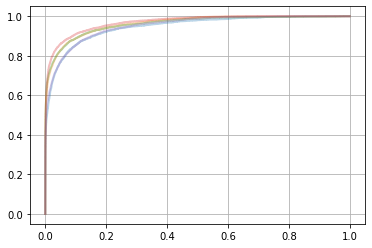

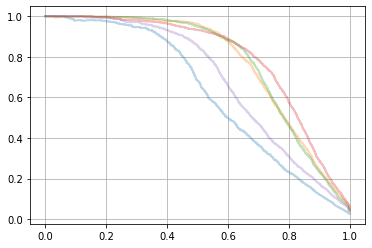

In [53]:
    start = time()
    plt.rcParams["axes.grid"] = True
    nfold = 5
    #skf = StratifiedKFold(n_splits=nfold, shuffle=True, random_state=42)
    skf = KFold(n_splits=nfold, shuffle=False, random_state=42)

    oof = np.zeros(len(train_df))
    mean_fpr = np.linspace(0,1,100)
    cms= []
    tprs = []
    aucs = []
    y_real = []
    y_proba = []
    recalls = []
    roc_aucs = []
    f1_scores = []
    accuracies = []
    precisions = []
    predictions = np.zeros(len(test_df))
    feature_importance_df = pd.DataFrame()

    i = 1
    
    for train_idx, valid_idx in skf.split(train_df, train_df.isFraud.values):
        print("\nfold {}".format(i))
        x_train = train_df.iloc[train_idx][features]
        y_train = train_df.iloc[train_idx][target]

        x_val = train_df.iloc[valid_idx][features]
        y_val = train_df.iloc[valid_idx][target]


        clf = cb.CatBoostClassifier(eval_metric="AUC",
                                    iterations= 2500, 
                                    early_stopping_rounds = 100,
                                    loss_function= 'Logloss', 
                                    bootstrap_type = 'Bernoulli')
    
        clf.set_params(**param_cat)
        clf.fit(x_train, y_train,   
            cat_features = cat_features_index, 
            verbose_eval = 100,
            eval_set = (x_val, y_val) )


        oof[valid_idx] = clf.predict_proba(x_val)[:,1] 

        predictions += clf.predict_proba(test_df[features])[:,1]  / nfold

        # Scores 
        roc_aucs.append(roc_auc_score(train_df.iloc[valid_idx][target].values, oof[valid_idx]))
        accuracies.append(accuracy_score(train_df.iloc[valid_idx][target].values, oof[valid_idx].round()))
        recalls.append(recall_score(train_df.iloc[valid_idx][target].values, oof[valid_idx].round()))
        precisions.append(precision_score(train_df.iloc[valid_idx][target].values ,oof[valid_idx].round()))
        f1_scores.append(f1_score(train_df.iloc[valid_idx][target].values, oof[valid_idx].round()))

        # Roc curve by folds
        f = plt.figure(1)
        fpr, tpr, t = roc_curve(train_df.iloc[valid_idx][target].values, oof[valid_idx])
        tprs.append(interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i,roc_auc))

        # Precion recall by folds
        g = plt.figure(2)
        precision, recall, _ = precision_recall_curve(train_df.iloc[valid_idx][target].values, oof[valid_idx])
        y_real.append(train_df.iloc[valid_idx][target].values)
        y_proba.append(oof[valid_idx])
        plt.plot(recall, precision, lw=2, alpha=0.3, label='P|R fold %d' % (i))  

        i= i+1

        # Confusion matrix by folds
        cms.append(confusion_matrix(train_df.iloc[valid_idx][target].values, oof[valid_idx].round()))

        # Features imp
        fold_importance_df = pd.DataFrame()
        fold_importance_df["Feature"] = features
        fold_importance_df["importance"] = pd.DataFrame(sorted(zip(clf.feature_importances_,x_train.columns)), 
                                                        columns=['Value','Feature'])['Value']
        fold_importance_df["fold"] = nfold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        

        # Metrics
    print(
        '\nCV roc score        : {0:.4f}, std: {1:.4f}.'.format(np.mean(roc_aucs), np.std(roc_aucs)),
        '\nCV accuracy score   : {0:.4f}, std: {1:.4f}.'.format(np.mean(accuracies), np.std(accuracies)),
        '\nCV recall score     : {0:.4f}, std: {1:.4f}.'.format(np.mean(recalls), np.std(recalls)),
        '\nCV precision score  : {0:.4f}, std: {1:.4f}.'.format(np.mean(precisions), np.std(precisions)),
        '\nCV f1 score         : {0:.4f}, std: {1:.4f}.'.format(np.mean(f1_scores), np.std(f1_scores))
        )
    length = time() - start

In [54]:
predictions.shape
oof.shape

(506691,)

(590540,)

In [55]:
all_pred = np.concatenate([oof,predictions])

In [56]:
all_pred.shape

(1097231,)

In [57]:
all_pred = pd.DataFrame(all_pred)

In [58]:
all_pred.shape

(1097231, 1)

In [61]:
all_pred.to_csv('CatBoost_cv9582_692features_oofAndTest.csv')

In [63]:
all_pred.shape
predictions.shape

(1097231, 1)

(506691,)

In [62]:
sub = pd.read_csv('sample_submission.csv')

sub.isFraud = predictions
sub.to_csv('CatBoost_cv9582_692features_TestOnly.csv', index=False)

In [ ]:
 
    start = time()
    plt.rcParams["axes.grid"] = True
    nfold = 5
    #skf = StratifiedKFold(n_splits=nfold, shuffle=True, random_state=42)
    skf = KFold(n_splits=nfold, shuffle=False, random_state=42)

    oof = np.zeros(len(train_df))
    mean_fpr = np.linspace(0,1,100)
    cms= []
    tprs = []
    aucs = []
    y_real = []
    y_proba = []
    recalls = []
    roc_aucs = []
    f1_scores = []
    accuracies = []
    precisions = []
    predictions = np.zeros(len(test_df))
    feature_importance_df = pd.DataFrame()

    i = 1
    clf = lgb.LGBMClassifier(n_jobs = 32)
    clf.set_params(**param_lgb)
    
    for train_idx, valid_idx in skf.split(train_df, train_df.isFraud.values):
        print("\nfold {}".format(i))
        x_train = train_df.iloc[train_idx][features]
        y_train = train_df.iloc[train_idx][target]

        x_val = train_df.iloc[valid_idx][features]
        y_val = train_df.iloc[valid_idx][target]

#         clf = lgb.LGBMClassifier()
#         clf.set_params(**param_lgb)
        clf.fit(x_train, y_train,   
                eval_metric =['auc'],
                verbose = 100,
                eval_set = (x_val, y_val) )  


        oof[valid_idx] = clf.predict_proba(x_val)[:,1] 

        predictions += clf.predict_proba(test_df[features])[:,1]  / nfold

        # Scores 
        roc_aucs.append(roc_auc_score(train_df.iloc[valid_idx][target].values, oof[valid_idx]))
        accuracies.append(accuracy_score(train_df.iloc[valid_idx][target].values, oof[valid_idx].round()))
        recalls.append(recall_score(train_df.iloc[valid_idx][target].values, oof[valid_idx].round()))
        precisions.append(precision_score(train_df.iloc[valid_idx][target].values ,oof[valid_idx].round()))
        f1_scores.append(f1_score(train_df.iloc[valid_idx][target].values, oof[valid_idx].round()))

        # Roc curve by folds
        f = plt.figure(1)
        fpr, tpr, t = roc_curve(train_df.iloc[valid_idx][target].values, oof[valid_idx])
        tprs.append(interp(mean_fpr, fpr, tpr))
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.4f)' % (i,roc_auc))

        # Precion recall by folds
        g = plt.figure(2)
        precision, recall, _ = precision_recall_curve(train_df.iloc[valid_idx][target].values, oof[valid_idx])
        y_real.append(train_df.iloc[valid_idx][target].values)
        y_proba.append(oof[valid_idx])
        plt.plot(recall, precision, lw=2, alpha=0.3, label='P|R fold %d' % (i))  

        i= i+1

        # Confusion matrix by folds
        cms.append(confusion_matrix(train_df.iloc[valid_idx][target].values, oof[valid_idx].round()))

        # Features imp
        fold_importance_df = pd.DataFrame()
        fold_importance_df["Feature"] = features
        fold_importance_df["importance"] = pd.DataFrame(sorted(zip(clf.feature_importances_,x_train.columns)), 
                                                        columns=['Value','Feature'])['Value']
        fold_importance_df["fold"] = nfold + 1
        feature_importance_df = pd.concat([feature_importance_df, fold_importance_df], axis=0)
        

        # Metrics
    print(
        '\nCV roc score        : {0:.4f}, std: {1:.4f}.'.format(np.mean(roc_aucs), np.std(roc_aucs)),
        '\nCV accuracy score   : {0:.4f}, std: {1:.4f}.'.format(np.mean(accuracies), np.std(accuracies)),
        '\nCV recall score     : {0:.4f}, std: {1:.4f}.'.format(np.mean(recalls), np.std(recalls)),
        '\nCV precision score  : {0:.4f}, std: {1:.4f}.'.format(np.mean(precisions), np.std(precisions)),
        '\nCV f1 score         : {0:.4f}, std: {1:.4f}.'.format(np.mean(f1_scores), np.std(f1_scores))
        )
    length = time() - start

In [ ]:
length

In [ ]:
feature_imp = pd.DataFrame(sorted(zip(clf.feature_importances_,features)), columns=['Value','Feature'])

feature_imp

In [ ]:
sub = pd.read_csv('sample_submission.csv')

In [ ]:
sub.isFraud = predictions
sub.to_csv('26_add_all_uidfeatures_9562.csv', index=False)

In [ ]:
important = [fea for fea in feature_imp['Feature'][-200:] if fea in train_df_added]

In [ ]:
list(train_df_added.columns)

In [ ]:
important = important[::-1]

In [ ]:
important = ['newuid4_ae_reconstruction_error_mean',
 'newuid4_TransactionAmt_mean',
 'newuid4_dist1_mean',
 'newuid4_ae_reconstruction_error_std',
 'newuid4_TransactionAmt_std',
 'newuid4_D3_mean',
 'newuid4_D2_mean',
 'newuid4_V307_std',
 'newuid4_D11_mean',
 'newuid4_D3_std',
 'newuid4_V307_mean',
 'newuid4_id_02_mean',
 'newuid4_D5_mean',
 'newuid4_D11_std',
 'newuid4_D15_mean',
 'newuid4_C13_std',
 'newuid4_card1_TransactionAmt_std_mean',
 'newuid4_D2_std',
 'newuid4_D8_mean',
 'newuid4_C13_fq_enc_mean',
 'newuid4_D5_std',
 'newuid4_TransactionAmt__divide_std',
 'newuid4_D4_mean',
 'newuid4_card2_TransactionAmt_std_mean',
 'newuid4_C13_fq_enc_std',
 'newuid4_C13_mean',
 'newuid4_card2_TransactionAmt_mean_mean',
 'newuid4_card1_TransactionAmt_mean_mean',
 'newuid4_V310_std',
 'newuid4_D15_std',
 'newuid4_D10_mean',
 'newuid4_dist2_mean',
 'newuid4_D10_std',
 'newuid4_D9_mean',
 'newuid4_uid2_TransactionAmt_std_mean',
 'newuid4_C2_fq_enc_mean',
 'newuid4_V310_mean',
 'newuid4_D4_std',
 'newuid4_ae_reconstruction_error__divide_std',
 'newuid4_card2_fq_enc_mean',
 'newuid4_C1_fq_enc_mean',
 'newuid4_C6_fq_enc_mean',
 'newuid4_id_05_mean',
 'newuid4_C14_fq_enc_mean',
 'newuid4_D1_mean',
 'newuid4_C11_fq_enc_mean',
 'newuid4_C9_fq_enc_mean',
 'newuid4_C1_mean',
 'newuid4_id_06_mean',
 'newuid4_uid2_TransactionAmt_mean_mean',
 'newuid4_C14_mean',
 'newuid4_D1_std',
 'newuid4_C2_fq_enc_std',
 'newuid4_id_02_std',
 'newuid4_V313_mean',
 'newuid4_C2_mean',
 'newuid4_uid_TransactionAmt_std_mean',
 'newuid4_dist1_std',
 'newuid4_V313_std',
 'newuid4_C13__divide_mean',
 'newuid4_D14_mean',
 'newuid4_C6_mean',
 'newuid4_V315_mean',
 'newuid4_card5_TransactionAmt_std_mean',
 'newuid4_C1_std',
 'newuid4_TransactionAmt__divide_mean',
 'newuid4_C13__divide_std',
 'newuid4_V315_std',
 'newuid4_C11_mean',
 'newuid4_C6_fq_enc_std',
 'newuid4_C13_fq_enc__divide_std',
 'newuid4_C1_fq_enc_std',
 'newuid4_uid_TransactionAmt_mean_mean',
 'newuid4_TransactionAmt__minus_mean',
 'newuid4_D15__minus_mean',
 'newuid4_D15__divide_std',
 'newuid4_D8_std',
 'newuid4_C14_fq_enc_std',
 'newuid4_C14__divide_mean',
 'newuid4_C9_mean',
 'newuid4_D10__divide_std',
 'newuid4_C6__divide_mean',
 'newuid4_C1_fq_enc__divide_std',
 'newuid4_D9_std',
 'newuid4_D1__divide_std',
 'newuid4_id_05_std',
 'newuid4_D4__minus_mean']

In [ ]:
important

In [ ]:
len(important)

In [ ]:
len(features)

In [ ]:
len(train_df_added.columns)

In [ ]:
raw = session1.get_object('25', 'features')

In [ ]:
raw

In [ ]:
important

In [ ]:
def CV_train(train_df, features):
    plt.rcParams["axes.grid"] = True
    nfold = 5
    #skf = StratifiedKFold(n_splits=nfold, shuffle=True, random_state=42)
    skf = KFold(n_splits=nfold, shuffle=False, random_state=42)

    oof = np.zeros(len(train_df))
    mean_fpr = np.linspace(0,1,100)
    cms= []
    tprs = []
    aucs = []
    y_real = []
    y_proba = []
    recalls = []
    roc_aucs = []
    f1_scores = []
    accuracies = []
    precisions = []
    #predictions = np.zeros(len(test_df))
    feature_importance_df = pd.DataFrame()
    
    print('feature length', len(features))

    i = 1
    clf = lgb.LGBMClassifier()
    clf.set_params(**param_lgb)
    
    for train_idx, valid_idx in skf.split(train_df, train_df[target].values):
        gc.collect()
        x_train = train_df.iloc[train_idx][features]
        y_train = train_df.iloc[train_idx][target]

        x_val = train_df.iloc[valid_idx][features]
        y_val = train_df.iloc[valid_idx][target]


        clf.fit(x_train, y_train,   
                eval_metric =['auc'],
                verbose = 100,
                eval_set = (x_val, y_val) )  



        roc_aucs.append(roc_auc_score(y_val.values,
                                      clf.predict_proba(x_val)[:,1] ))



    print(
        '\nCV roc score        : {0:.4f}, std: {1:.4f}.'.format(np.mean(roc_aucs), np.std(roc_aucs))
        )


    return np.mean(roc_aucs)

In [ ]:
features = features[:397]

In [ ]:
len(features)

In [ ]:
fea_importance = important

In [ ]:
len(features)
#fea_importance.remove('Date')
fea_importance

In [ ]:
base_score = 0.9508

In [ ]:
len(features)
base_score
len(fea_importance)
train_df[features + fea_importance].shape

In [ ]:
import gc
gc.collect()

In [ ]:
from time import time

In [ ]:
param_lgb = {'subsample': 0.95,
             'colsample_bytree': 0.9,
             'max_depth': 50,
             'min_child_weight': 0.0029805017044362268,
             'min_child_samples': 10,
             'num_leaves': 381, # use 381
             'reg_alpha': 1.0,
             'reg_lambda': 2.0,
             'n_estimators':3000,
             'learning_rate': 0.03,
             'early_stopping_rounds': 100,
             'first_metric_only': True,
             #'class_weight':'balanced',
             
                'objective': 'binary',
                'save_binary': True,
                'seed': 1337,
                'feature_fraction_seed': 1337,
                'bagging_seed': 1337,
                'drop_seed': 1337,
                'data_random_seed': 1337,
                'boosting_type': 'gbdt',
                'verbose': 100,
                'is_unbalance': False,
                'boost_from_average': True,
                'metric':'auc'
    }

In [ ]:
train_df[features].shape

In [ ]:
gc.collect()

In [ ]:
'daypassed_minus_D15' 'daypassed_plus_D15' 'daypassed_minus_D2' 

In [ ]:
result = automated_add_cv(train_df = train_df, 
                          test_df = test_df, 
                          base_score = base_score,
                          features = features, 
                          feature_to_add = fea_importance, 
                          param_lgb = param_lgb)

In [ ]:
result = automated_add_cv_group(train_df = train_df, 
                          test_df = test_df, 
                          base_score = base_score,
                          features = features, 
                          feature_to_add = fea_importance_group, 
                          param_lgb = param_lgb)

In [ ]:
def automated_add_cv_group(train_df, 
                     test_df,
                     base_score,
                     features, 
                     feature_to_add, 
                     param_lgb):
    
    history = []
    base_score = deepcopy(base_score)
    
    for fea in feature_to_add:
        print('score before', fea, base_score)
        start = time()       
        
        features_tmp = deepcopy(features)
        features_tmp += fea
        print('add:', fea, 'Total:', len(features_tmp), 'correct?:', [fea_ in features_tmp for fea_ in fea])
            
        score = CV_train(train_df, features_tmp)
        history.append(score)
        gc.collect()
              
        if score >= base_score:
#             features = deepcopy(features_tmp)
#             base_score = score
            add = True
        else:
            add = False
         
        print(fea, 'score:', score)    
        print('score after', fea, base_score, 'add?', add)
        print(fea, 'excution time', time() - start)
            
    return (features, history)

In [ ]:
def automated_add_cv(train_df, 
                     test_df,
                     base_score,
                     features, 
                     feature_to_add, 
                     param_lgb):
    
    history = []
    base_score = deepcopy(base_score)
    
    for fea in feature_to_add:
        print('score before', fea, base_score)
        start = time()       
        
        features_tmp = deepcopy(features)
        features_tmp.append(fea)
        print('add:', fea, 'Total:', len(features_tmp), 'correct?:', fea in features_tmp)
            
        score = CV_train(train_df, features_tmp)
        history.append(score)
        gc.collect()
              
        if score >= base_score:
            features = deepcopy(features_tmp)
            base_score = score
         
        print(fea, 'score:', score)    
        print('score after', fea, base_score, 'add?', fea in features)
        print(fea, 'excution time', time() - start)
            
    return (features, history)

In [ ]:
def automated_remove_cv(train_df, 
                     base_score,
                     features, 
                     feature_to_remove, 
                     param_lgb):
    
    history = []
    base_score = deepcopy(base_score)
    
    for fea in feature_to_remove:
        print('score before', fea, base_score)
        start = time()       
        
        features_tmp = deepcopy(features)
        del features_tmp[features_tmp.index(fea)]
        print('remove:', fea, 'Total:', len(features_tmp), 'correct?:', fea not in features_tmp)
            
        score = CV_train(train_df, features_tmp)
        history.append(score)
        gc.collect()
        
        print(fea, 'score', score)
        if score >= base_score:
            features = deepcopy(features_tmp)
            base_score = score
         
            
        print('score after', fea, base_score, 'add?', fea in features)
        print(fea, 'excution time', time() - start)
            
    return (features, history)

In [ ]:
def automated_reomval(x_train_list, 
                      x_val_list,
                      y_train_list,
                      y_val_list,
                      base_socre_list,
                      features, 
                      feature_to_remove, 
                      param_lgb):
    
    history = []
    base_socre_list = deepcopy(base_socre_list)
    
    num_test = len(x_train_list)
    print('total number of test:', num_test)
        
    for fea in feature_to_remove:
        print('score before', fea, base_socre_list)
        start = time()
        score_list = []            
        features_tmp = deepcopy(features)
        del features_tmp[features_tmp.index(fea)]
        
        delete_fea = True
        
        for i in range(num_test):
            print('Now test ', i, 'remove:', fea, 'Total:', len(features_tmp), 'correct?:', fea not in features_tmp)
            
            x_train = x_train_list[i][features_tmp]
            x_val = x_val_list[i][features_tmp]
            y_train = y_train_list[i]
            y_val = y_val_list[i]
            
            #train model
            clf = lgb.LGBMClassifier()
            clf.set_params(**param_lgb)
            clf.fit(x_train, y_train,   
                    eval_metric =['auc'],
                    verbose = 10,
                    eval_set = (x_val, y_val) )  

            # scoring
            predict_val = clf.predict_proba(x_val)[:,1]
            score = roc_auc_score(y_val, predict_val)
            score_list.append(score)
            gc.collect()
            if score < base_socre_list[i]:
                delete_fea = False
                break
                
        
        history.append(score_list)
        if delete_fea:
            base_socre_list = deepcopy(score_list)
            features = deepcopy(features_tmp)        
            
        print('score before fea', base_socre_list, 'remove?', delete_fea)
        print(fea, 'excution time', time() - start)
            
    return (features, history)

In [ ]:
import gc
gc.collect()

In [ ]:
# remove = ['hourD15minus_mean_all',
#           'Date+HourTransactionAmtminus_mean_all']
# for fea in remove:
#     features.remove(fea)

In [ ]:
len(features)

In [ ]:
param_lgb = {'subsample': 0.8999999999997461,
             'colsample_bytree': 0.8999999999999121,
             'max_depth': 50,
             'min_child_weight': 0.0029805017044362268,
             'min_child_samples': 20,
             'num_leaves': 381, # use 381
             'reg_alpha': 1.0,
             'reg_lambda': 2.0,
             'n_estimators':600,
             'early_stopping_rounds': 100,
             'first_metric_only': True,
             #'class_weight':'balanced',
             
                'objective': 'binary',
                'save_binary': True,
                'seed': 1337,
                'feature_fraction_seed': 1337,
                'bagging_seed': 1337,
                'drop_seed': 1337,
                'data_random_seed': 1337,
                'boosting_type': 'gbdt',
                'verbose': 100,
                'is_unbalance': False,
                'boost_from_average': True,
                'metric':'auc'
    }

In [ ]:
clf = lgb.LGBMClassifier()
clf.set_params(**param_lgb)

In [ ]:
base_socre_list = []

In [ ]:
start = time()
clf.fit(train_df_1[features], train_df_1[target],  
        eval_metric =['auc'],
        verbose = 1,
        eval_set = (val_df_1[features], val_df_1[target]) )  
print(time() - start)

In [ ]:
# scoring
predict_val = clf.predict_proba(val_df_1[features])[:,1]
score = roc_auc_score(val_df_1[target], predict_val)
base_socre_list.append(score)

In [ ]:
score

In [ ]:
clf = lgb.LGBMClassifier()
clf.set_params(**param_lgb)

In [ ]:
import gc
gc.collect()

In [ ]:
start = time()
clf.fit(train_df_2[features], train_df_2[target],  
        eval_metric =['auc'],
        verbose = 1,
        eval_set = (val_df_2[features], val_df_2[target]) )  
print(time() - start)

In [ ]:
# scoring
predict_val = clf.predict_proba(val_df_2[features])[:,1]
score = roc_auc_score(val_df_2[target], predict_val)
base_socre_list.append(score)

In [ ]:
score

In [ ]:
base_socre_list

In [ ]:
base_socre_list = base_socre_list[::-1]

In [ ]:
len(features)
len(feature_to_remove)
base_socre_list

In [ ]:
feature_to_remove

In [ ]:
gc.collect()

In [ ]:
result = automated_reomval(x_train_list = [train_df_2, train_df_1], 
                  x_val_list = [val_df_2, val_df_1] ,
                  y_train_list = [train_df_2[target], train_df_1[target]], 
                  y_val_list = [val_df_2[target], val_df_1[target]] ,
                  base_socre_list = base_socre_list,
                  features = features, 
                  feature_to_remove = feature_to_remove, 
                  param_lgb = param_lgb)

In [ ]:
len(result[0])

In [ ]:
session1.add_object_as_file('13+TimeGrand_GroupBy_Minus', 'features_selected', result[0])

In [ ]:
def automated_add(x_train_list, 
                  x_val_list,
                  y_train_list,
                  y_val_list,
                  base_socre_list,
                  features, 
                  feature_to_remove, 
                  param_lgb):
    
    history = []
    base_socre_list = deepcopy(base_socre_list)
    
    num_test = len(x_train_list)
    print('total number of test:', num_test)
        
    for fea in feature_to_remove:
        print('score before', fea, base_socre_list)
        start = time()
        score_list = []            
        features_tmp = deepcopy(features)
        del features_tmp[features_tmp.index(fea)]
        
        delete_fea = True
        
        for i in range(num_test):
            print('Now test ', i, 'remove:', fea, 'Total:', len(features_tmp), 'correct?:', fea not in features_tmp)
            
            x_train = x_train_list[i][features_tmp]
            x_val = x_val_list[i][features_tmp]
            y_train = y_train_list[i]
            y_val = y_val_list[i]
            
            #train model
            clf = lgb.LGBMClassifier()
            clf.set_params(**param_lgb)
            clf.fit(x_train, y_train,   
                    eval_metric =['auc'],
                    verbose = 10,
                    eval_set = (x_val, y_val) )  

            # scoring
            predict_val = clf.predict_proba(x_val)[:,1]
            score = roc_auc_score(y_val, predict_val)
            score_list.append(score)
            gc.collect()
            if score < base_socre_list[i]:
                delete_fea = False
                break
                
        
        history.append(score_list)
        if delete_fea:
            base_socre_list = deepcopy(score_list)
            features = deepcopy(features_tmp)        
            
        print('score before fea', base_socre_list, 'remove?', delete_fea)
        print(fea, 'excution time', time() - start)
            
    return (features, history)

In [ ]:
def automated_reomval(x_train_list, 
                      x_val_list,
                      y_train_list,
                      y_val_list,
                      base_socre_list,
                      features, 
                      feature_to_remove, 
                      param_lgb):
    
    history = []
    base_socre_list = deepcopy(base_socre_list)
    
    num_test = len(x_train_list)
    print('total number of test:', num_test)
        
    for fea in feature_to_remove:
        print('score before', fea, base_socre_list)
        start = time()
        score_list = []            
        features_tmp = deepcopy(features)
        del features_tmp[features_tmp.index(fea)]
        
        delete_fea = True
        
        for i in range(num_test):
            print('Now test ', i, 'remove:', fea, 'Total:', len(features_tmp), 'correct?:', fea not in features_tmp)
            
            x_train = x_train_list[i][features_tmp]
            x_val = x_val_list[i][features_tmp]
            y_train = y_train_list[i]
            y_val = y_val_list[i]
            
            #train model
            clf = lgb.LGBMClassifier()
            clf.set_params(**param_lgb)
            clf.fit(x_train, y_train,   
                    eval_metric =['auc'],
                    verbose = 10,
                    eval_set = (x_val, y_val) )  

            # scoring
            predict_val = clf.predict_proba(x_val)[:,1]
            score = roc_auc_score(y_val, predict_val)
            score_list.append(score)
            gc.collect()
            if score < base_socre_list[i]:
                delete_fea = False
                break
                
        
        history.append(score_list)
        if delete_fea:
            base_socre_list = deepcopy(score_list)
            features = deepcopy(features_tmp)        
            
        print('score before fea', base_socre_list, 'remove?', delete_fea)
        print(fea, 'excution time', time() - start)
            
    return (features, history)

In [ ]:
def automated_selection(base_data,  external_data,
                        base_cat_features, base_num_features, 
                        cat_feature_to_select, num_feature_to_select, y_train):
    
    score_list = []
    fea_list = []
    
    feature_to_select = cat_feature_to_select + num_feature_to_select
    for fea in feature_to_select:
        y_train_back = deepcopy(y_train)
        
        data_tmp = deepcopy(data)
        data_tmp[fea] = external_data[fea]
        
        if fea in cat_feature_to_select:
            cat_features = list(set(base_cat_features + [fea]))
            num_features = deepcopy(base_num_features)
        else:
            num_features = list(set(base_num_features + [fea]))
            cat_features = deepcopy(base_cat_features)
    
    
        # split train and validation
        x_train = data_tmp[90540:590540]
        x_val = data_tmp[:90540]

        y_val = y_train[:90540]
        y_train = y_train[90540:]


        x_train = x_train[cat_features + num_features]
        x_val = x_val[cat_features + num_features]

        cat_features_index = list(range(len(cat_features)))
    
    
        print('shape', x_train.shape)
        print('current fea',fea)
        print('correct?:', fea in x_train.columns)
        #train model
        
        gbm = lgb.LGBMClassifier(n_jobs=-1, 
                         silent = False,
                         n_estimators = 800, 
                         max_depth =  -1,
                         num_leaves = 31, 
                         colsample_bytree = 1,
                         class_weight = 'balanced',
                         early_stopping_rounds = 100,
                         min_child_samples = 10,
                         #min_child_weight = 10,  
                         first_metric_only = True) 
        
        start = time()
        gbm.fit(x_train, y_train,   
                eval_metric =['auc'],
                categorical_feature  = cat_features_index, 
                verbose = True,
                eval_set = (x_val, y_val) )
        print(fea, 'excution time', time() - start)

        # scoring
        predict_val = gbm.predict_proba(x_val)[:,1]
        score = roc_auc_score(y_val, predict_val)
        score_list.append(score)
        fea_list.append(fea)
        
        del data_tmp
        del x_train
        del x_val
        del y_train
        del y_val
        
        y_train = deepcopy(y_train_back)
        
    return (score_list, fea_list)

In [ ]:
def automated_reomval(base_data, 
                      base_cat_features, base_num_features, 
                      cat_feature_to_select, num_feature_to_select, y_train):
    
    score_list = []
    fea_list = []
    
    feature_to_select = cat_feature_to_select + num_feature_to_select
    for fea in feature_to_select:
        y_train_back = deepcopy(y_train)
        
        data_tmp = deepcopy(data)
        del data_tmp[fea]
        
        if fea in cat_feature_to_select:
            cat_features = deepcopy(base_cat_features)
            del cat_features[cat_features.index(fea)]
            
            num_features = deepcopy(base_num_features)
        else:
            num_features = deepcopy(num_features)
            del num_features[num_features.index(fea)]
            
            cat_features = deepcopy(base_cat_features)
    
    
        # split train and validation
        x_train = data_tmp[90540:590540]
        x_val = data_tmp[:90540]

        y_val = y_train[:90540]
        y_train = y_train[90540:]


        x_train = x_train[cat_features + num_features]
        x_val = x_val[cat_features + num_features]

        cat_features_index = list(range(len(cat_features)))
    
    
        print('shape', x_train.shape)
        print('current fea',fea)
        print('correct?:', fea not in x_train.columns)
        #train model
        
        gbm = lgb.LGBMClassifier(n_jobs=-1, 
                         silent = False,
                         n_estimators = 1200, 
                         max_depth =  -1,
                         num_leaves = 31, 
                         colsample_bytree = 1,
                         class_weight = 'balanced',
                         early_stopping_rounds = 100,
                         min_child_samples = 10,
                         #min_child_weight = 10,  
                         first_metric_only = True) 
        
        start = time()
        gbm.fit(x_train, y_train,   
                eval_metric =['auc'],
                categorical_feature  = cat_features_index, 
                verbose = True,
                eval_set = (x_val, y_val) )
        print(fea, 'excution time', time() - start)

        # scoring
        predict_val = gbm.predict_proba(x_val)[:,1]
        score = roc_auc_score(y_val, predict_val)
        score_list.append(score)
        fea_list.append(fea)
        
        del data_tmp
        del x_train
        del x_val
        del y_train
        del y_val
        
        y_train = deepcopy(y_train_back)
        
    return (score_list, fea_list)